In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


In [2]:
#import data
df = pd.read_excel(r"C:\Users\PC\OneDrive\Desktop\churn_dataset.xlsx")

In [3]:
#Screening the data
df.head()

,Age,Tenure,Sex,Churn
0,56,8,Male,No
1,46,63,Female,No
2,32,11,Female,No
3,60,8,Male,No
4,25,35,Male,No


In [4]:
#Checking Null Values
df.isnull().sum()

Age       0
Tenure    0
Sex       0
Churn     0
dtype: int64

In [5]:
#Checking Duplicates
print(df.duplicated().sum())

0


<Axes: >

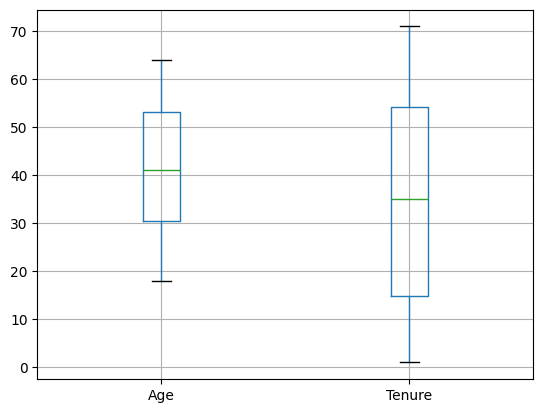

In [6]:
#Checking Outliers
df.boxplot()

In [7]:
#Encoding the Categorical Columns
df_encoded = pd.get_dummies(df, columns=["Sex",], drop_first=True, dtype= 'uint8')

In [8]:
#Screening the data after Encoding
df_encoded.head()

,Age,Tenure,Churn,Sex_Male
0,56,8,No,1
1,46,63,No,0
2,32,11,No,0
3,60,8,No,1
4,25,35,No,1


In [9]:
#Define data & target column 
X = df.drop(['Churn'], axis=1) 
y = df['Churn']

In [10]:
#Splitting Data into Train & Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [11]:
#Scaling the Data
cat_features = ['Sex']
num_features = ['Age','Tenure']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features)
    ]
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [12]:
pd.DataFrame(X_train_scaled).head()

,0,1,2
0,1.581345,1.195229,Female
1,1.442249,-0.238329,Male
2,-0.157352,-0.477255,Female
3,-0.435544,1.051873,Male
4,1.372702,-0.238329,Female
